In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('height_weight_dataset.csv')

In [4]:
df.head()

,Height_cm,Weight_kg
0,187.6,98.2
1,174.0,49.8
2,179.8,50.9
3,192.4,84.5
4,188.7,52.4


In [5]:
plt.scatter(df['Weight_kg'],df['Height_cm'])
plt.xlabel("weight")
plt.ylabel("height")

Text(0, 0.5, 'height')

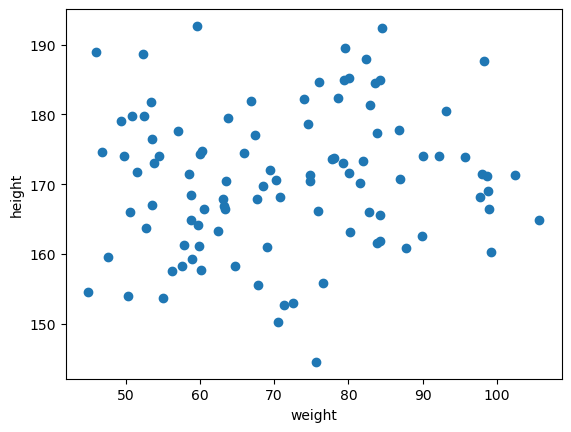

In [6]:
plt.show()

In [7]:
df.corr

<bound method DataFrame.corr of     Height_cm  Weight_kg
0       187.6       98.2
1       174.0       49.8
2       179.8       50.9
3       192.4       84.5
4       188.7       52.4
..        ...        ...
95      177.1       67.4
96      170.1       81.6
97      187.9       82.4
98      171.3      102.4
99      174.0       90.0

[100 rows x 2 columns]>

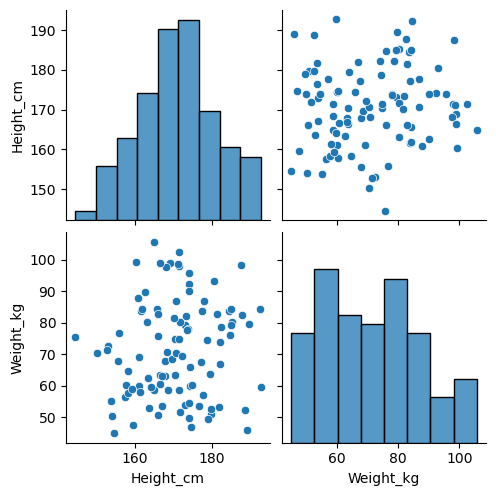

In [8]:
import seaborn as sns
sns.pairplot(df)
plt.show()


In [9]:
X=df[['Weight_kg']]
Y=df['Height_cm']

In [10]:
X_series=df['Weight_kg']
np.array(X_series).shape

(100,)

In [11]:
np.array(Y).shape

(100,)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [14]:
X_train.shape

(75, 1)

In [15]:
##standardisation
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [18]:
X_test

,Weight_kg
83,45.0
53,57.6
70,83.8
45,84.2
44,105.7
39,53.6
22,74.5
80,64.7
10,98.0
0,98.2


In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
regression=LinearRegression(n_jobs=-1)

In [23]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [24]:
print("Cofficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Cofficient or slope: [0.32206708]
Intercept: 171.5306666666667


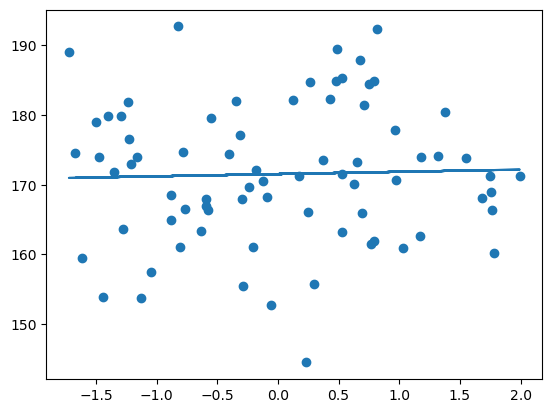

In [40]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()


###prediction of test data
1. predicted height out put =intercept +coef_(weights)
2. Y_pred=171.5 +0.3(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [45]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


765.3952558045202
25.898017004869317
27.66577770106093


R square 
formula
R^2=1*ssr/sst
R^2=cofficint of determination ssr= sum of squares of residuals sst = total sum of squares

In [46]:
from sklearn.metrics import r2_score

In [47]:
score=r2_score(Y_test,Y_pred)
print(score)

-6.925415145681509


ADJUSTED R2

In [49]:
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-7.269998412885053

In [50]:
###OLS linear regression
import statsmodels.api as sm

In [51]:
model=sm.OLS(Y_train,X_train).fit()

In [52]:
prediction=model.predict(X_test)
print(prediction)

83    14.493019
53    18.551064
70    26.989221
45    27.118048
44    34.042490
39    17.262795
22    23.993997
80    20.837740
10    31.562574
0     31.626987
18    25.507713
30    18.840924
73    19.388438
33    22.705729
90    16.296594
4     16.876315
76    18.647684
77    19.227405
12    18.390030
31    25.153439
55    19.324025
88    18.969751
26    20.451259
42    23.349863
69    24.090617
dtype: float64


In [54]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Height_cm   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.014
Method:                 Least Squares   F-statistic:                          0.0002600
Date:                Wed, 16 Jul 2025   Prob (F-statistic):                       0.987
Time:                        00:14:52   Log-Likelihood:                         -492.40
No. Observations:                  75   AIC:                                      986.8
Df Residuals:                      74   BIC:                                      989.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------